In [ ]:
# AI소프트웨어과_2023143011_유진_골키퍼_데이터시각화

In [ ]:
# Pandas 라이브러리
import pandas as pd

# NumPy (데이터 연산 및 처리)
import numpy as np

# Matplotlib (데이터 시각화)
import matplotlib.pyplot as plt

# Seaborn (고급 데이터 시각화)
import seaborn as sns

In [ ]:
# 한글 폰트 설치 및 설정
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로를 명시적으로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())  # 폰트 설정

In [ ]:
# GK_CSV 파일 읽기
GK_file_path = '/content/transfermarket_o34_Goalkeeper_top50.csv'  # 파일 경로
data = pd.read_csv(GK_file_path)

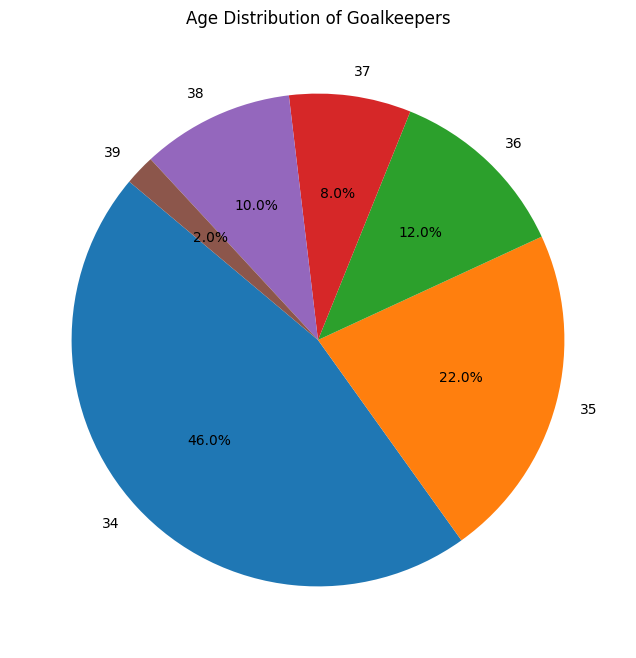

In [ ]:
# 골키퍼 연령별 분포 원그래프 생성
plt.figure(figsize=(8, 8))
age_distribution.plot.pie(
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=140,     # 시작 각도
    label='',           # 레이블 제거
    explode=None        # 빈 공간 없음
)
plt.title('Age Distribution of Goalkeepers')  # 그래프 제목
plt.ylabel('')  # Y축 레이블 제거
plt.show()

         Player         Club       Nation  Age Market Value
0  David de Gea        Spain        Spain   34       €5.00m
1   Yann Sommer  Switzerland  Switzerland   35       €5.00m
2   Kevin Trapp      Germany      Germany   34       €4.00m
3  Manuel Neuer      Germany      Germany   38       €4.00m
4  Jason Steele      England      England   34       €3.50m
Nation
Brazil                6
Germany               4
Spain                 3
Mexico                3
Switzerland           2
Portugal              2
Morocco               2
Hungary               2
England               2
Korea, South          1
Chile                 1
Uruguay               1
Russia                1
Bosnia-Herzegovina    1
Slovakia              1
Costa Rica            1
Argentina             1
United States         1
Netherlands           1
Norway                1
France                1
Türkiye               1
Peru                  1
Colombia              1
Sweden                1
Jamaica               1
Egypt    

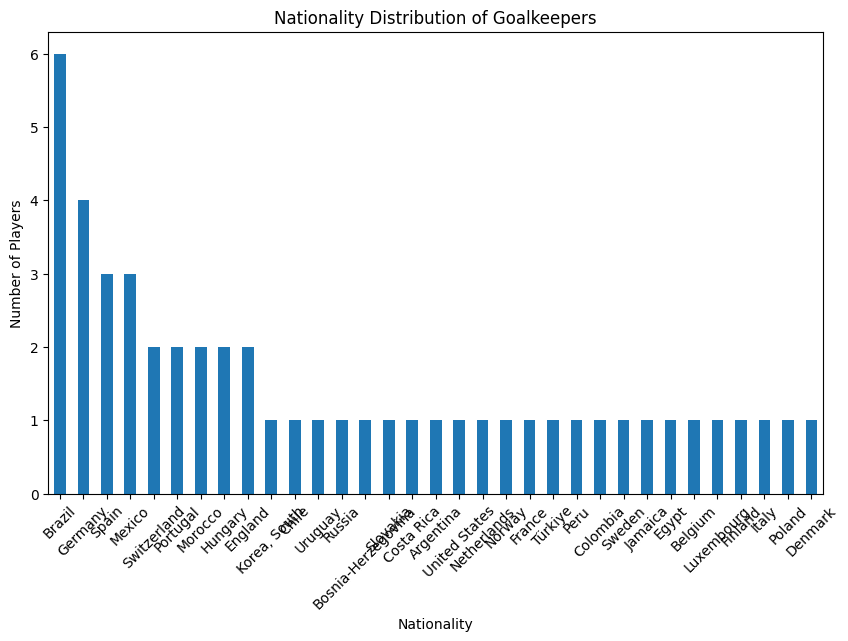

In [ ]:
# 골키퍼 국적별 분포 막대그래프 생성

# 데이터 로드
GK_file_path = '/content/transfermarket_o34_Goalkeeper_top50.csv'  # 파일 경로
data = pd.read_csv(GK_file_path)

# 데이터 확인
print(data.head())  # 데이터 샘플 확인

# 국적별 분포 계산
if 'Nation' in data.columns:
    nationality_distribution = data['Nation'].value_counts()
    print(nationality_distribution)  # 확인용 출력

    # 국적별 분포 시각화
    plt.figure(figsize=(10, 6))
    nationality_distribution.plot.bar()
    plt.title('Nationality Distribution of Goalkeepers')  # 그래프 제목
    plt.xlabel('Nationality')  # X축 레이블
    plt.ylabel('Number of Players')  # Y축 레이블
    plt.xticks(rotation=45)  # X축 레이블 회전
    plt.show()
else:
    print("Error: 'Nation' column not found in the dataset.")

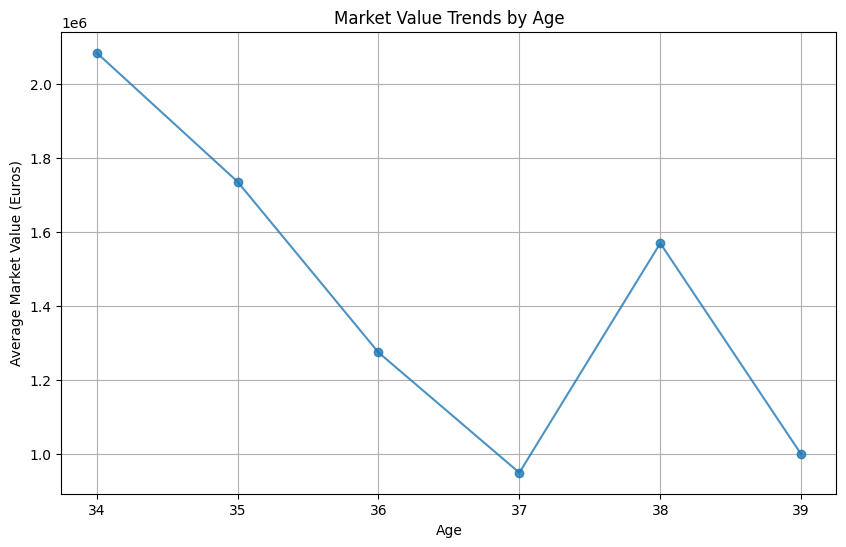

In [ ]:
# 연령별 시장 가치 추세 분석 선그래프 생성

# Market Value 데이터를 숫자로 변환하는 함수
def convert_market_value(value):
    value = value.replace('€', '').replace(',', '').strip()  # '€'는 유로(€) 기호
    if 'm' in value:
        return float(value.replace('m', '')) * 1_000_000
    elif 'k' in value:
        return float(value.replace('k', '')) * 1_000
    else:
        return float(value)

# Market Value Numeric 열 생성
data['Market Value Numeric'] = data['Market Value'].apply(convert_market_value)

# 연령별 평균 시장 가치 계산
age_market_value_trends = data.groupby('Age')['Market Value Numeric'].mean()

# 연령별 시장 가치 추세 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 깨짐 방지를 위해 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 6))
plt.plot(age_market_value_trends, marker='o', linestyle='-', alpha=0.8)
plt.title('Market Value Trends by Age')
plt.xlabel('Age')
plt.ylabel('Average Market Value (Euros)')
plt.grid(True)
plt.show()